In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from numpy import linalg as LA
from pylab import cm

import math
from scipy.integrate import quad
from scipy.misc import derivative



In [3]:
# Plot parameteras , Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)

Spin boson model solution (based on Gernot's Example: https://www1.itp.tu-berlin.de/schaller/download/TOQT.pdf page 136)


Exact solution:  pure-dephasing limit ($\Delta=0$)

$ H_S= \frac{\omega}{2} \sigma_z  $

$ H_B= \sum_{k} \omega_k a_k ^{\dagger} a_k $

$ H_I= \sigma_z \otimes \sum t_{k}\left(a_{k}+a_{k}^{\dagger}\right)$ 

The populatios remain unafected since $H_I$ conmustes with $H_S$, but the coherenes decay accroding to(in the interaction picture) : 

$\rho_{01}(t)=\exp \left\{-\frac{4}{\pi} \int_{0}^{\infty} J^{(0)}(\omega) \frac{\sin ^{2}(\omega t / 2)}{\omega^{2}} \operatorname{coth}\left(\frac{\beta \omega}{2}\right) d \omega\right\} \rho_{01}^{0}$

with $|\psi > (0) = \frac{1}{\sqrt{2}} ( |0>+ |1>  $

We will use this example for spectral densury 


$J^{(0)}(\omega)=2 \pi \sum_{k}\left|t_{k}\right|^{2} \delta\left(\omega-\omega_{k}\right)=\Gamma \frac{\omega \delta^{7}}{\left[(\omega-\epsilon)^{2}+\delta^{2}\right]^{2}\left[(\omega+\epsilon)^{2}+\delta^{2}\right]^{2}}$

with this paremeters:

$\mathbf{\Gamma} \beta=10000, \delta \beta=\mathbf{1}, \boldsymbol{\epsilon} \beta=2, \omega \beta=1$

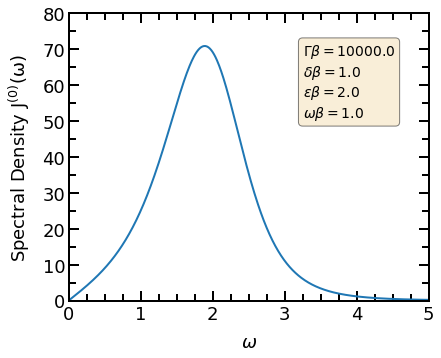

In [4]:
#set of Parameters 1
beta= 1.0
Gamma=  10000.0/beta
delta= 1.0/beta
epsilon = 2.0 /beta 
omega=1.0/beta

#Initial Coherence
rho_01_init=0.5


#Original Spectral Density
def J(w):
    return Gamma * ((w * delta**7) /(((w-epsilon)**2+delta**2)**2 * ((w+epsilon)**2+delta**2)**2 ))




##PLot


fig = plt.figure(figsize=(5, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlim(0, 5*omega)
ax.set_ylim(-0.2, 80)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
# Add the x and y-axis labels
ax.set_xlabel('$\omega$', labelpad=10)
ax.set_ylabel(r'Spectral Density $ \mathregular{ J^{(0)}(\omega)}$', labelpad=10)

#parameters 

textstr = '\n'.join((
    r'$\Gamma \beta=%.1f$' % (Gamma, ),
    r'$\delta \beta=%.1f$' % (delta, ),
    r'$\epsilon \beta=%.1f$' % (epsilon, ),
    r'$\omega \beta=%.1f$' % (omega, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, 0.9, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

vecfunc = np.vectorize(J)
w = np.arange(0.0, omega*10 , 0.01)
T = vecfunc(w)
ax.plot(w, T, linewidth=2, color=colors(0), label='Sample 1')
#legends
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
# Save figure
plt.savefig('Original_Spectral_Density_1000.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

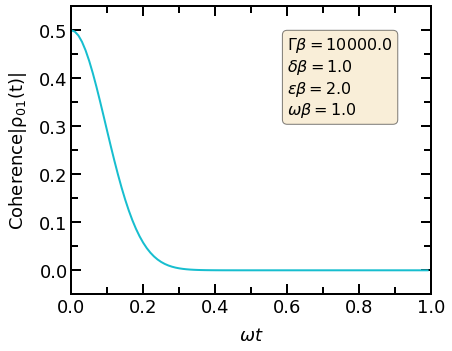

In [5]:


def integrand(w, t):
    return J(w)* (np.sin(w*t/2))**2 / (w**2)  / np.tanh (beta*w /2 )


def expint(t):
    return quad(integrand, 0, np.inf, args=(t))[0]


def rho_01(t):
    return np.exp(-4.0/np.pi * expint(t) ) * rho_01_init


##Plot 

fig = plt.figure(figsize=(5, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlim(0, 1*omega)
ax.set_ylim(-0.05, 0.55)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
# Add the x and y-axis labels
ax.set_xlabel('$\omega t$', labelpad=10)
ax.set_ylabel(r'Coherence$ \mathregular{|\rho_{01}(t)|}$', labelpad=10)

#parameters 

textstr = '\n'.join((
    r'$\Gamma \beta=%.1f$' % (Gamma, ),
    r'$\delta \beta=%.1f$' % (delta, ),
    r'$\epsilon \beta=%.1f$' % (epsilon, ),
    r'$\omega \beta=%.1f$' % (omega, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.6, 0.9, textstr, transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)


vecfunc = np.vectorize(rho_01)
t1 = np.arange(0.0, omega , 0.01)
T1 = vecfunc(t1)
ax.plot(t1, T1, linewidth=2, color=colors(5), label='Sample 1')

# Save figure
plt.savefig('Coherence_exact_1000.png', dpi=300, transparent=False, bbox_inches='tight')


plt.show()

Now we apply the reaccion coodinate mapping and we identify the new Hamiltnians parts :

$  H_0= \frac{\omega}{2} \sigma_z +  \Omega_0 b ^{\dagger} b   $

$   H_B=   \sum_{k} \Omega_k b_k ^{\dagger} b_k $

$   H_I=\sum_{\alpha} A_{\alpha} \otimes B_{\alpha} =g \sigma_z  \left( b + b ^{\dagger} \right)+ \left( b + b ^{\dagger} \right) \sum_k h_k \left( b_k + b_k ^{\dagger} \right)$

with $A_1=g \sigma_z  \left( b + b ^{\dagger} \right)$ , $B_1= \mathbf{1} $ $, A_2= \left( b + b ^{\dagger} \right) $ and  $ B_2= \sum_k h_k \left( b_k + b_k ^{\dagger} \right) $

where the energy of the RC and the coupling strength become:

$\Omega_{0}^{2}=\frac{\left(\delta^{2}+\epsilon^{2}\right)^{2}}{5 \delta^{2}+\epsilon^{2}}, \quad g^{2}=\frac{\Gamma \delta^{4} \sqrt{5 \delta^{2}+\epsilon^{2}}}{64\left(\delta^{2}+\epsilon^{2}\right)^{2}}
$


The mapping transformation can be computed explicitly, where the transformed spectral density becomes ohmic:

$ J^{(1)}(\omega)=\frac{16 \omega \delta^{3} \sqrt{5 \delta^{2}+\epsilon^{2}}}{\omega^{4}+\omega^{2}\left(6 \delta^{2}-2 \epsilon^{2}\right)+\left(5 \delta^{2}+\epsilon^{2}\right)^{2}} $




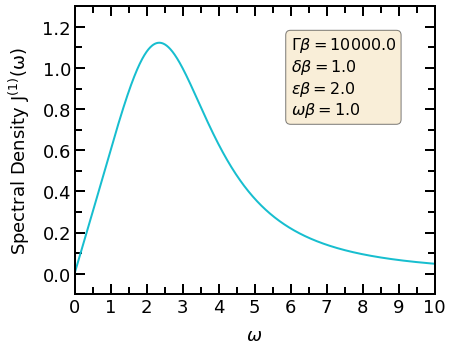

In [6]:
##We build the supersystem Hamiltonian with N_RC number of modes for the RC

N_RC = 40 # number of basis states to consider
b = destroy(N_RC)

Omega_Rc=np.sqrt( (delta**2+ epsilon**2 )**2/(5*delta**2+ epsilon**2))
g=np.sqrt( (Gamma*delta**4*np.sqrt(5*delta**2+ epsilon**2))/(64*(delta**2+epsilon**2)**2)  )
#print(Omega_Rc)

def J_1(w):
    return (16*w*delta**3*np.sqrt(5*delta**2+ epsilon**2))/(w**4+w**2*(6*delta**2-2*epsilon**2)+ (5*delta**2+epsilon**2)**2)


###Plot 

fig = plt.figure(figsize=(5, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlim(0, 10*omega)
ax.set_ylim(-0.1, 1.3)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
# Add the x and y-axis labels
ax.set_xlabel('$\omega$', labelpad=10)
ax.set_ylabel(r'Spectral Density $ \mathregular{ J^{(1)}(\omega)}$', labelpad=10)

#parameters 

textstr = '\n'.join((
    r'$\Gamma \beta=%.1f$' % (Gamma, ),
    r'$\delta \beta=%.1f$' % (delta, ),
    r'$\epsilon \beta=%.1f$' % (epsilon, ),
    r'$\omega \beta=%.1f$' % (omega, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.6, 0.9, textstr, transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)



vecfunc = np.vectorize(J_1)
w = np.arange(0.0, 10.0*omega, 0.01)
T = vecfunc(w)
ax.plot(w, T, linewidth=2, color=colors(5), label='Sample 1')

# Save figure
plt.savefig('RC_spectral_density.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()







In [7]:
#Supersystem Hamiltonian 
H0= omega/2 *tensor(sigmaz(), identity(N_RC) )  + Omega_Rc *tensor(identity(2) , b.dag() * b )

In order to aplly the master equation we need to preapre the initial state as: 

$\rho_{0}=\rho_{S}^{0} \otimes \frac{e^{-\beta \Omega\left[b^{\dagger} b\right]}}{Z_{R C}}$

In [8]:
##Rc inicial state Thermal  


H1 = b.dag() * b
H_Rc= -beta*Omega_Rc*H1
Exp= H_Rc.expm()
Z_Rc=Exp.tr()
rho_Rc_init=Exp/Z_Rc
#print(rho_Rc_init)

#Sistem inital state
psi0 = (1/np.sqrt(2.)) * (basis(2, 0) + basis(2, 1) )
#psi0 =  basis(2, 0) 

##Spin Inicial state 
rho_Spin= psi0*psi0.dag()
#print(rho_Spin)

###Tensor producto of the initial state
rho_init=tensor(rho_Spin,rho_Rc_init) 

print(rho_init.ptrace(0))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


The evolutions is given by the master equation (in the Schodinger picture):

$\dot{\boldsymbol{\rho}}_{0}(t)=  -\mathrm{i}\left[ H_0  , \boldsymbol{\rho}_{0}(t)\right] -\mathrm{i}\left[ A_1  , \boldsymbol{\rho}_{0}(t)\right] +  \gamma' \left(b \boldsymbol{\rho}_{0}(t) b^{\dagger}-\frac{1}{2}\left\{b^{\dagger} b, \boldsymbol{\rho}_{0}(t)\right\}\right)+\bar{\gamma}' \left(b^{\dagger} \boldsymbol{\rho}_{0}(t) b-\frac{1}{2}\left\{b b^{\dagger}, \boldsymbol{\rho}_{0}(t)\right\}\right)$


where $\gamma'=J(\Omega)\left[1+n_{B}(\Omega)\right]$ , $ \bar{\gamma}' = J(\Omega) n_{B}(\Omega)$ and $n_{B}(\omega)=\left[e^{\beta \omega}-1\right]^{-1}$

and where we have neglected the Lamb Shift. 

In [9]:
def nb(w):
    return 1/(np.exp(beta*w)-1)

def gamma_prime(w):
    if w==0:
        return J_1(0.000000001)*(1+nb(0.000000001))
    else:
        return J_1(w)*(1+nb(w))

gamma_prime_n= J_1(Omega_Rc)*(1+nb(Omega_Rc))
gamma_bar_prime_n= J_1(Omega_Rc)*nb(Omega_Rc)

print(gamma_prime_n,gamma_bar_prime_n)


1.186002113574108 0.22400686416793208


In [10]:
## Limbland operator 
R1=tensor(identity(2) ,  b )
R2=tensor(identity(2) , b.dag()  )
R3=tensor( sigmaz(), identity(N_RC)  )

L0=[np.sqrt(gamma_prime_n) * (R1), np.sqrt(gamma_bar_prime_n)*(R2)  ]


## A1 operator
A1=g* tensor(sigmaz(),  b.dag() + b )

## A1 in the interaction picture 

#New Hamiltonian 
H_new= H0+ A1

We find the the coherences as:

$\left|\rho_{01}\right|=\mid \frac{1}{2} \operatorname{Tr}\left\{\left(\sigma^{x}+\mathrm{i} \sigma^{y}\right) \rho(t)\right\}$

In [108]:
t0_RC = 0.0
tf_RC = 10.0*omega
time_steps_RC = 500
dt_RC= (tf_RC-t0_RC)/time_steps_RC
## Time range
t_RC = np.linspace(0, tf_RC, time_steps_RC)

result = mesolve(H_new , rho_init, t_RC, L0)

states_RC=result.states

trace_RC=[0 for i in range(len(states_RC))]

for i in range(len(states_RC)):
    trace_RC[i]=  states_RC[i].ptrace(0)

print(trace_RC[0])    


p01=[0 for i in range(len(states_RC))]
for i in range(len(states_RC)):
    p01[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace_RC[i]))



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


Now we evolve with the the RedField equation in order to compare: 


$H_S^{\prime}= \frac{\omega}{2} \sigma_z +  \Omega_0 b ^{\dagger} b +g \sigma_z  \left( b + b ^{\dagger} \right) $

$\begin{aligned} \dot{\rho}=-& \mathrm{i}\left[H_{S}^{\prime}, \rho\right]-\int_{0}^{\infty} C(+\tau)\left[\left(b+b^{\dagger}\right), e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+\mathrm{i} H_{S}^{\prime} \tau} \rho(t)\right] d \tau \\ &-\int_{0}^{\infty} C(-\tau)\left[\rho(t) e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+i H_{S}^{\prime} \tau},\left(b+b^{\dagger}\right)\right] d \tau \end{aligned}$

where we need to find the supersystem Hamitionial states $H_{S}^{\prime}\left|a^{\prime}\right\rangle=E_{a}^{\prime}\left|a^{\prime}\right\rangle$, we can find:  

$\int_{0}^{\infty} C(\tau) e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+\mathrm{i} H_{S}^{\prime} \tau} d \tau=\sum_{a b}\left\langle a^{\prime}\left|\left(b+b^{\dagger}\right)\right| b^{\prime}\right\rangle \int_{0}^{\infty} C(\tau) e^{-\mathrm{i}\left(E_{a}^{\prime}-E_{b}^{\prime}\right) \tau} d \tau\left|a^{\prime}\right\rangle\left\langle b^{\prime}\right|$

where: 

$\int_{0}^{\infty} C(\tau) e^{+\mathrm{i}\left(E_{b}^{\prime}-E_{a}^{\prime}\right) \tau} d \tau =\frac{\gamma\left(E_{b}^{\prime}-E_{a}^{\prime}\right)}{2}+\frac{\mathrm{i}}{2 \pi} \mathcal{P} \int \frac{\gamma(\omega)}{E_{b}^{\prime}-E_{a}^{\prime}-\omega} d \omega$ 

where we will negecled the principal value term (lamb Shift) and $\gamma(\omega)=J(\omega)\left[1+n_{B}(\omega)\right]$

In [109]:
def nb(w):
    return 1/(np.exp(beta*w)-1)

def gamma(w):
    if (w==0):
        return J_1(0.0000001)*(1+nb(0.0000001))
    else:  
        return J_1(w)*(1+nb(w))

  
H0_ger=omega/2 *tensor(sigmaz(), identity(N_RC) )  + Omega_Rc *tensor(identity(2) , b.dag() * b )  + g* tensor(sigmaz(),  b.dag() + b )

all_energy, all_state = H0_ger.eigenstates(sparse=sparse)

Nmax=N_RC*2
Limb_op1=0
Limb_op2=0
B=tensor(identity(2),b+ b.dag())
for j in range(Nmax):
    for k in range(Nmax):
        A = (B).matrix_element(all_state[j].dag(), all_state[k])
        delE = (all_energy[k] - all_energy[j])
        X1=gamma(delE)/2
        X2=gamma(-delE)/2
        Limb_op1 = Limb_op1 + A*X1*all_state[j] * all_state[k].dag() 
        Limb_op2 = Limb_op2 + A*X2*all_state[j] * all_state[k].dag()


t0_ger = 0.0
tf_ger = 10.0*omega
time_steps_ger = 500
dt_ger= (tf_ger-t0_ger)/time_steps_ger

L_ger= -spre(B* Limb_op1)+ sprepost(Limb_op1, B)-  spost(Limb_op2*B) +  sprepost( B, Limb_op2)
## Time range
t_ger = np.linspace(0, tf_ger, time_steps_ger)


output_ger = mesolve(H0_ger, rho_init, t_ger, [L_ger])

In [110]:
states_ger=output_ger.states


trace_ger=[0 for i in range(len(states_ger))]
for i in range(len(states_ger)):
    trace_ger[i]=  states_ger[i].ptrace(0)

print(trace_ger[0])    


p01_ger=[0 for i in range(len(states_ger))]
for i in range(len(states_ger)):
    p01_ger[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace_ger[i]))
    
print(p01_ger[0])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]
0.4999999999999998


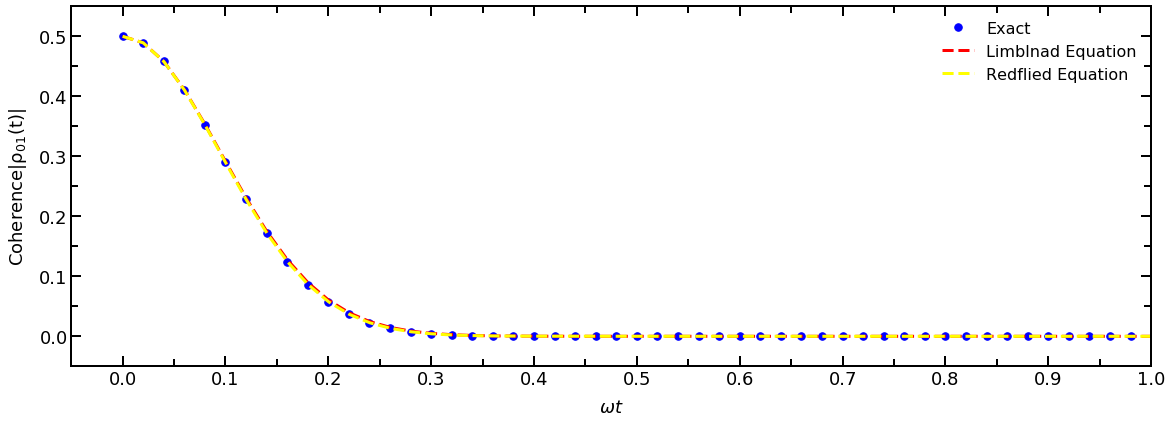

In [111]:


fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0, 0, 1, 1])



# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlim(-0.05, 1*omega)
ax.set_ylim(-0.05, 0.55)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
# Add the x and y-axis labels
ax.set_xlabel('$\omega t$', labelpad=10)
ax.set_ylabel(r'Coherence$ \mathregular{|\rho_{01}(t)|}$', labelpad=10)

#parameters 

textstr = '\n'.join((
    r'$\Gamma \beta=%.1f$' % (Gamma, ),
    r'$\delta \beta=%.1f$' % (delta, ),
    r'$\epsilon \beta=%.1f$' % (epsilon, ),
    r'$\omega \beta=%.1f$' % (omega, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax.text(0.6, 0.9, textstr, transform=ax.transAxes, fontsize=16,
#        verticalalignment='top', bbox=props)

ax.plot(t1[::2],T1[::2],"." ,label='Exact', markersize=15, color='blue')
ax.plot(t_RC,p01       ,"--",label='Limblnad Equation', linewidth=3, color='red')
ax.plot(t_ger,p01_ger  ,"--" ,label='Redflied Equation', linewidth=3, color='yellow')


ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
# Save figure
#plt.savefig('Solutions_RC_comparation.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()



We check  that the populatiosn reaims constand:





In [112]:


p00=[0 for i in range(len(states_RC))]
for i in range(len(states_RC)):
    p00[i]=abs(expect(0.5*(identity(2)+sigmaz()),trace_RC[i]))

print(p00[0])

p00_ger=[0 for i in range(len(states_ger))]
for i in range(len(states_ger)):
    p00_ger[i]=abs(expect(0.5*(identity(2)+sigmaz()),trace_ger[i]))
    
print(p00_ger[0])

0.4999999999999998
0.4999999999999998


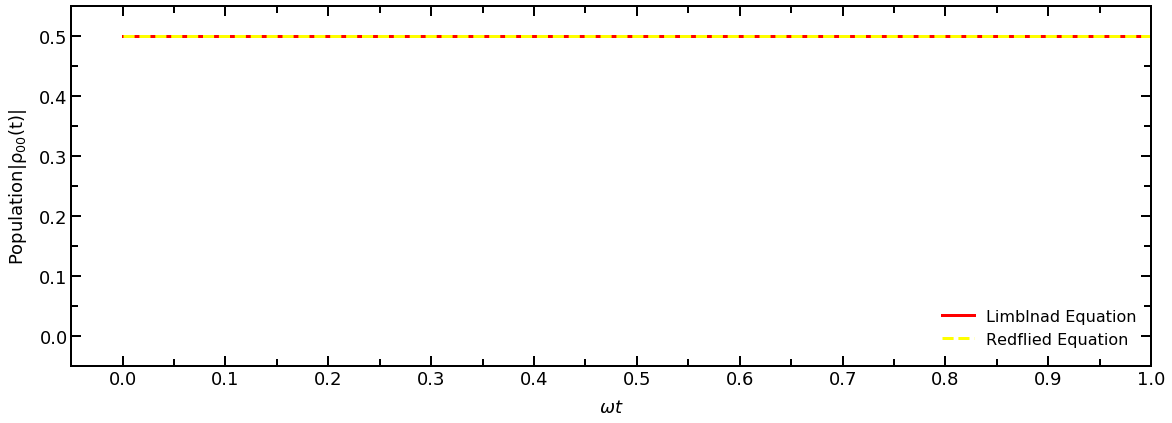

In [113]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0, 0, 1, 1])



# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlim(-0.05, 1*omega)
ax.set_ylim(-0.05, 0.55)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
# Add the x and y-axis labels
ax.set_xlabel('$\omega t$', labelpad=10)
ax.set_ylabel(r'Population$ \mathregular{|\rho_{00}(t)|}$', labelpad=10)

#parameters 

textstr = '\n'.join((
    r'$\Gamma \beta=%.1f$' % (Gamma, ),
    r'$\delta \beta=%.1f$' % (delta, ),
    r'$\epsilon \beta=%.1f$' % (epsilon, ),
    r'$\omega \beta=%.1f$' % (omega, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax.text(0.6, 0.9, textstr, transform=ax.transAxes, fontsize=16,
#        verticalalignment='top', bbox=props)

ax.plot(t_RC,p00       ,"-",label='Limblnad Equation', linewidth=3, color='red')
ax.plot(t_ger,p00_ger  ,"--" ,label='Redflied Equation', linewidth=3, color='yellow')


ax.legend(bbox_to_anchor=(1, 0.2), loc=1, frameon=False, fontsize=16)
# Save figure
#plt.savefig('Populations.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

Now we look at the emviorment occupations, posstion and momentum define as. 

$\langle\hat{n}(t)\rangle=\operatorname{tr}\{\hat{n} \rho_{RC}(t)\} = \operatorname{tr}\{b^{\dagger} b \rho_{RC}(t)\}$

$\hat{x}=\sqrt{\frac{1}{2 \Omega}}\left(b^{\dagger}+b\right) \quad$ and $\quad \hat{p}=i \sqrt{\frac{\Omega}{2}}\left(b^{\dagger}-b\right) .$

In [114]:
rho_RC=[0 for i in range(len(states_RC))]
n=[0 for i in range(len(states_RC))]
n_sigma= [0 for i in range(len(states_RC))]
possition_RC=[0 for i in range(len(states_RC))]
momentum_RC=[0 for i in range(len(states_RC))]
sum_aux_RC=[0 for i in range(len(states_RC))]
for i in range(len(states_RC)):
    rho_RC[i]=  states_RC[i].ptrace(1)


for i in range(len(states_RC)):
    n[i]=expect(b.dag()*b,rho_RC[i])
    possition_RC[i]=expect(  (b.dag()+b) /(np.sqrt(2*Omega_Rc)),rho_RC[i])
    momentum_RC[i]=expect(  1j*(b.dag()-b) *np.sqrt(Omega_Rc/2),rho_RC[i])
    n_sigma[i]=np.sqrt( expect(b.dag()*b*b.dag()*b,rho_RC[i])- expect(b.dag()*b,rho_RC[i])**2)
    sum_aux_RC[i]=n[i]+n_sigma[i]

In [115]:
rho_RC_ger=[0 for i in range(len(states_ger))]
n_ger=[0 for i in range(len(states_ger))]
n_sigma_ger= [0 for i in range(len(states_ger))]
possition_RC_ger=[0 for i in range(len(states_ger))]
momentum_RC_ger=[0 for i in range(len(states_ger))]
sum_aux_RC_ger=[0 for i in range(len(states_RC))]

for i in range(len(states_ger)):
    rho_RC_ger[i]=  states_ger[i].ptrace(1)


for i in range(len(states_ger)):
    n_ger[i]=expect(b.dag()*b,rho_RC_ger[i])
    possition_RC_ger[i]=expect(  (b.dag()+b) /(np.sqrt(2*Omega_Rc)),rho_RC_ger[i])
    momentum_RC_ger[i]=expect(  1j*(b.dag()-b) *np.sqrt(Omega_Rc/2),rho_RC_ger[i])
    n_sigma_ger[i]=np.sqrt(expect(b.dag()*b*b.dag()*b,rho_RC_ger[i])- expect(b.dag()*b,rho_RC_ger[i])**2)
    sum_aux_RC_ger[i]=n_ger[i]+n_sigma_ger[i]

/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


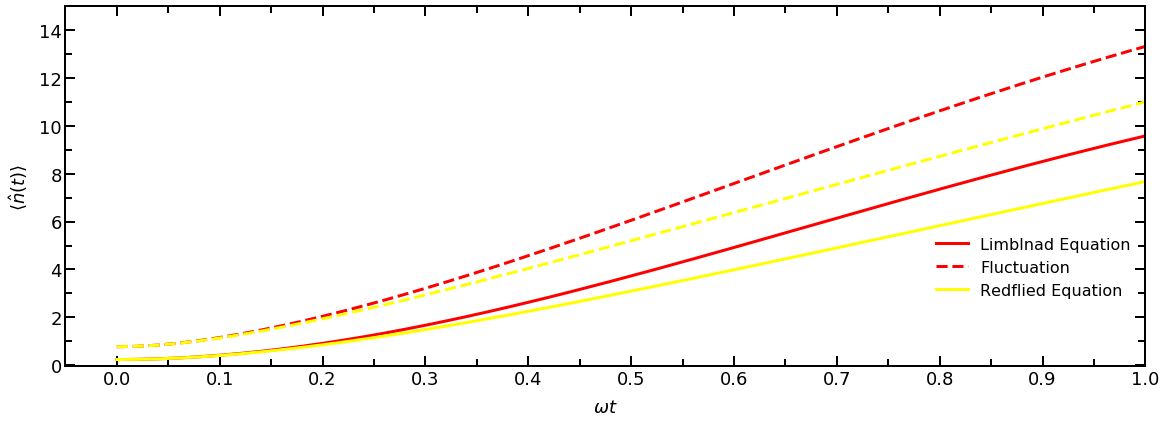

In [116]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0, 0, 1, 1])



# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlim(-0.05, 1*omega)
ax.set_ylim(-0.05, 15)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
# Add the x and y-axis labels
ax.set_xlabel('$\omega t$', labelpad=10)
ax.set_ylabel(r'$\langle\hat{n}(t)\rangle$', labelpad=10)

#parameters 

textstr = '\n'.join((
    r'$\Gamma \beta=%.1f$' % (Gamma, ),
    r'$\delta \beta=%.1f$' % (delta, ),
    r'$\epsilon \beta=%.1f$' % (epsilon, ),
    r'$\omega \beta=%.1f$' % (omega, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax.text(0.6, 0.9, textstr, transform=ax.transAxes, fontsize=16,
#        verticalalignment='top', bbox=props)

ax.plot(t_RC,n       ,"-",label='Limblnad Equation', linewidth=3, color='red')
ax.plot(t_RC,sum_aux_RC     ,"--",label='Fluctuation',  linewidth=3, color='red')
ax.plot(t_ger,n_ger  ,"-" ,label='Redflied Equation', linewidth=3, color='yellow')
ax.plot(t_ger,sum_aux_RC_ger     ,"--", linewidth=3, color='yellow')


ax.legend(bbox_to_anchor=(1, 0.4), loc=1, frameon=False, fontsize=16)
# Save figure
#plt.savefig('Populations.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


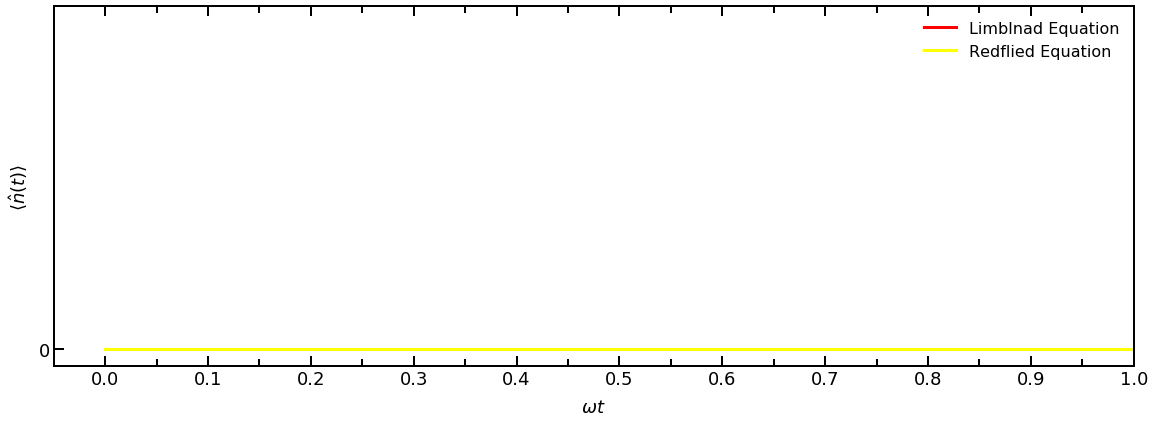

In [117]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0, 0, 1, 1])



# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlim(-0.05, 1*omega)
ax.set_ylim(-0.05, 1)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
# Add the x and y-axis labels
ax.set_xlabel('$\omega t$', labelpad=10)
ax.set_ylabel(r'$\langle\hat{n}(t)\rangle$', labelpad=10)

#parameters 

textstr = '\n'.join((
    r'$\Gamma \beta=%.1f$' % (Gamma, ),
    r'$\delta \beta=%.1f$' % (delta, ),
    r'$\epsilon \beta=%.1f$' % (epsilon, ),
    r'$\omega \beta=%.1f$' % (omega, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax.text(0.6, 0.9, textstr, transform=ax.transAxes, fontsize=16,
#        verticalalignment='top', bbox=props)

ax.plot(t_RC,possition_RC       ,"-",label='Limblnad Equation', linewidth=3, color='red')
ax.plot(t_RC,momentum_RC     ,"--", linewidth=3, color='red')
ax.plot(t_ger,possition_RC_ger  ,"-" ,label='Redflied Equation', linewidth=3, color='yellow')
ax.plot(t_ger,momentum_RC_ger  ,"--", linewidth=3, color='yellow')


ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
# Save figure
#plt.savefig('Populations.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

Now we look ath the change in the energy of the enviorment:

$\langle E\rangle (t) = \langle E\rangle_{0}+\frac{2}{\pi} \int_{0}^{\infty} \frac{J^{(0)}(\omega)}{\omega} \sin ^{2}\left(\frac{\omega t}{2}\right) d \omega$

$  \frac{ d \langle E\rangle (t)}{dt}  = \frac{2}{\pi} \int_{0}^{\infty} J^{(0)}(\omega) \sin \left(\frac{\omega t}{2}\right) \cos \left(\frac{\omega t}{2}\right) d \omega $

that should be accesible via the RC: 

$\frac{d}{d t}\left\langle\sum_{k} \omega_{k} a_{k}^{\dagger} a_{k}\right\rangle=-\frac{d}{d t}\left\langle\sigma^{z} \sum_{k} t_{k}\left(a_{k}+a_{k}^{\dagger}\right)\right\rangle=-\frac{d}{d t} g\left\langle\sigma^{z}\left(b+b^{\dagger}\right)\right\rangle$


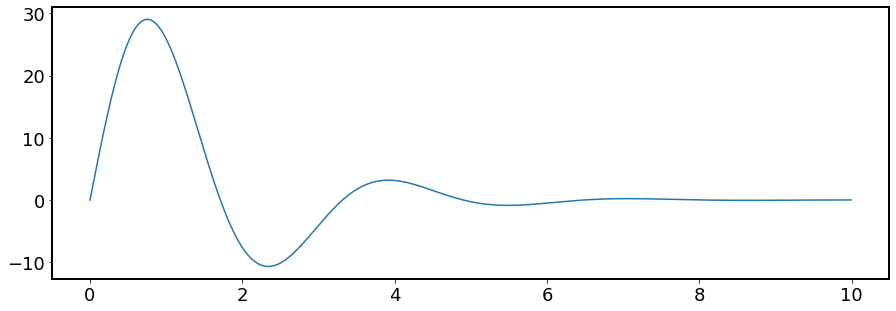

In [118]:

def integrand_en_1(w, t):
    return J(w)* np.sin(w*t/2) * np.cos(w*t/2)*2/np.pi 


def integral_en(t):
    return quad(integrand_en_1, 0, np.inf, args=(t), limit=100)[0]


 
vecfunc = np.vectorize(integral_en)
ten = np.arange(0.0, 10.0, 0.01)
Ten = vecfunc(ten)
#plt.plot (ten, Ten)
#plt.show()

In [119]:
energy_RC=[0 for i in range(len(states_RC))]
for i in range(len(states_RC)):
    energy_RC[i]=-expect( g* tensor(sigmaz(),  b.dag() + b ) ,states_RC[i])
    
denergy_RC=[0 for i in range(len(states_RC))] 

for i in range(len(states_RC)-1):
    denergy_RC[i]=(energy_RC[i+1]-energy_RC[i])/dt_RC

In [120]:
energy_g=[0 for i in range(len(states_ger))]
for i in range(len(states_RC)):
    energy_g[i]=-expect( g* tensor(sigmaz(),  b.dag() + b ) ,states_ger[i])
    
denergy_g=[0 for i in range(len(states_RC))] 

for i in range(len(states_RC)-1):
    denergy_g[i]=(energy_g[i+1]-energy_g[i])/dt_ger

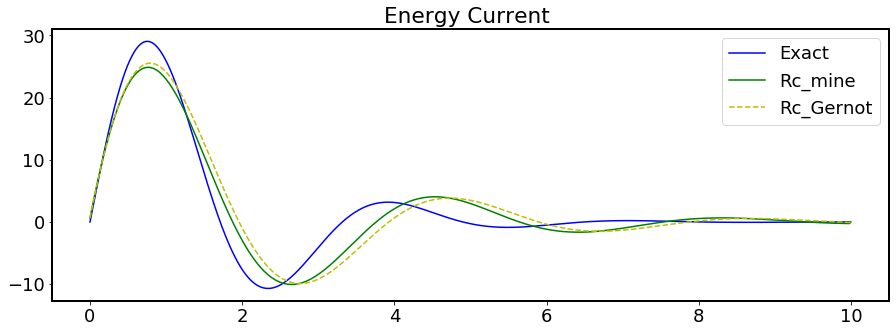

In [121]:
plt.title("Energy Current ")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot (ten, Ten,"-",label='Exact', color = "b")
plt.plot(t_RC,denergy_RC,"-",label='Rc_mine', color = "g")
plt.plot(t_ger,denergy_g,"--",label='Rc_Gernot', color = "y")
plt.legend()
plt.show()

# 


In [57]:

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1,'../../')
import q_trajectories as qtr


In [62]:

t0 = 0.
tf = 1.0
time_steps = 1000
dt = int(abs(tf-t0)/time_steps)

## Time range
t = np.linspace(t0, tf, np.int32(time_steps))

## Initial state 

#psi0 = np.array([1,0], dtype = np.complex128)
#rho0 = np.array([[0.5,0.2],[0.1,0.5]], dtype = np.complex128, order='C')
rho0=rho_init.full()

aux2=Hlamb.full()

aux=H0.full()

## Hamiltonian
def H(t):
    return aux2+aux

## Lindblad operators
def L(t):
    return [L0[0].full(), L0[1].full()]

## feedback test


## Unraveling
### This matrix must follow the conditions stated on Diosí's paper: |u| <= 1
u_matrix =np.eye(len(L(0)))

print(H(0))
print(u_matrix)


aux11=expect(tensor(identity(2) , b.dag() * b.dag() ) , rho_init)- ( expect(tensor(identity(2) , b.dag() ), rho_init) * expect(tensor(identity(2) , b.dag() ) , rho_init) )
aux22=expect(tensor(identity(2) , b * b ) , rho_init)- ( expect(tensor(identity(2) , b ), rho_init) * expect(tensor(identity(2) , b ) , rho_init) )

print(aux11, aux22)
#c1=aux11/(abs(aux11))


[[  11.75      +0.j    4.33012702+0.j    0.        +0.j ...
     0.        +0.j    0.        +0.j    0.        +0.j]
 [   4.33012702+0.j   13.41666667+0.j    6.12372436+0.j ...
     0.        +0.j    0.        +0.j    0.        +0.j]
 [   0.        +0.j    6.12372436+0.j   15.08333333+0.j ...
     0.        +0.j    0.        +0.j    0.        +0.j]
 ...
 [   0.        +0.j    0.        +0.j    0.        +0.j ...
    39.08333333+0.j  -18.37117307+0.j    0.        +0.j]
 [   0.        +0.j    0.        +0.j    0.        +0.j ...
   -18.37117307+0.j   40.75      +0.j  -18.87458609+0.j]
 [   0.        +0.j    0.        +0.j    0.        +0.j ...
     0.        +0.j  -18.87458609+0.j -182.58333333+0.j]]
[[1. 0.]
 [0. 1.]]
0j 0j


In [63]:
test = qtr.System(H, rho0, t, lindbladList = L, uMatrix = u_matrix)

In [64]:
ind_traj_psi = test.diffusiveRhoTrajectory(10)


In [65]:
#ensemble_rho = test.diffusiveRhoEnsemble(100)
rho_diff = test.diffusiveRhoAverage(n_trajectories = 1,  traj_type='density_matrix')

In [66]:
print(rho_diff[0].shape)
print(rho_diff[1])

(40, 40)
[[4.05562199e-01+0.j         8.18922468e-03+0.00142587j
  0.00000000e+00+0.j         ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [8.18922468e-03-0.00142587j 7.66008047e-02+0.j
  2.18742740e-03+0.00038086j ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         2.18742740e-03-0.00038086j
  1.44680232e-02+0.j         ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 ...
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         ... 4.05523517e-15+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]]


In [67]:
for i in range(len(rho_diff)):
    rho_diff[i]=Qobj(rho_diff[i], dims= [[2, 20], [2, 20]])
    
    
print(rho_diff[0])        

Quantum object: dims = [[2, 20], [2, 20]], shape = (40, 40), type = oper, isherm = True
Qobj data =
[[0.4055622  0.         0.         ... 0.         0.         0.        ]
 [0.         0.0766008  0.         ... 0.         0.         0.        ]
 [0.         0.         0.01446802 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [68]:
exp_result_QT=[0 for i in range(len(rho_diff))]

trace_QT=[0 for i in range(len(rho_diff))]

for i in range(len(rho_diff)):
    exp_result_QT[i]=  (-1j*H0*t[i]).expm()* rho_diff[i]*  (1j*H0*t[i]).expm()
    trace_QT[i]=  rho_diff[i].ptrace(0)
    #trace_QT[i]=  exp_result_QT[i].ptrace(0)

print(trace_QT[0])    


p01_QT=[0 for i in range(len(rho_diff))]
for i in range(len(rho_diff)):
    p01_QT[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace_QT[i]))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


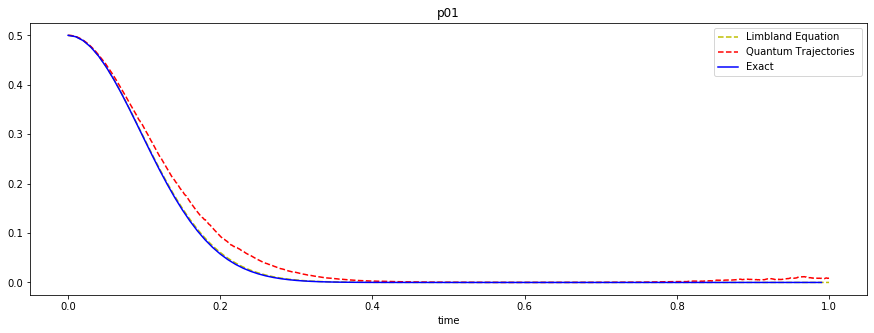

In [70]:
plt.title("p01")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(t3,p01,"--",label='Limbland Equation', color = "y")
plt.plot(t,p01_QT,"--",label='Quantum Trajectories ', color = "r")
plt.plot (t1 , T1,"-",label='Exact', color = "b") 
plt.xlabel("time")
#plt.xlim([0.0, 0.4])
#plt.ylim([0.0, 0.5])
plt.legend()
plt.show()

In [25]:
##Rc dynamics 
rho_RC_QT=[0 for i in range(len(rho_diff))]


for i in range(len(rho_diff)):
    rho_RC_QT[i]=  exp_result_QT[i].ptrace(1)

print(rho_RC_QT[0])   

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[8.11124397e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.53201609e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.89360463e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00

In [26]:
n_QT=[0 for i in range(len(rho_diff))]
n_sigma=[0 for i in range(len(rho_diff))]
plot=[0 for i in range(len(rho_diff))]
for i in range(len(rho_diff)):
    n_QT[i]=expect(b.dag()*b,rho_RC_QT[i])
    n_sigma[i]=expect(b.dag()*b*b.dag()*b,rho_RC_QT[i])- expect(b.dag()*b,rho_RC_QT[i])**2
    plot[i]=n_QT[i]+np.sqrt(n_sigma[i])


/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


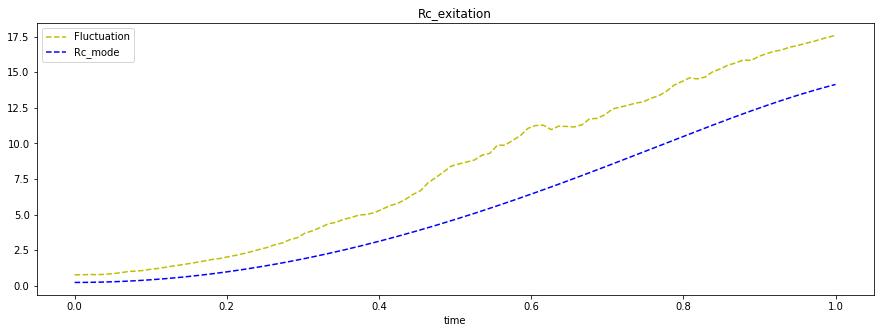

In [27]:
plt.title("Rc_exitation")
plt.rcParams['figure.figsize'] = [15,5]
#plt.plot(t,n_QT,"--",label='Rc_mode_QT', color = "g")
plt.plot(t,plot,"--",label='Fluctuation', color = "y")
plt.plot(t3,n,"--",label='Rc_mode', color = "b")
plt.xlabel("time")
plt.legend()
plt.show()